In [7]:
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

-----------
Initializing structure...
time for choose_chunkdivision = 5.50747e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.182852 s
-----------
KPOINT: 1.5, 9.64181, 0
    near maximum in trace
    iteration    1: trace = 1.944800569899116 (198.74% change)
    iteration    2: trace = 1.172086692925024 (49.5824% change)
    iteration    3: trace = 1.077455156452438 (8.41341% change)
    iteration    4: trace = 1.04001246895409 (3.53655% change)
    iteration    5: trace = 1.024290026356412 (1.52327% change)
    iteration    6: trace = 1.016880435846964 (0.726014% change)
    iteration    7: trace = 1.01182283898712 (0.498604% change)
    iteration    8: trace = 1.008501143373874 (0.328828% change)
    iteration    9: trace = 1.006868268739519 (0.162042% change)
    iteration   10: trace = 1.00608536607667 (0.0777865% change)
    iteration   11: trace = 1.005623679844607 (0.0458999% change)
    iteration   12: trace = 1.005

/home/user/anaconda3/envs/mp/lib/python3.11/site-packages/meep/visualization.py:1402: UserWarning: Warning: The 'sim' argument in Animate2D is deprecated and has no effect. It will be removed in a future release.
  warnings.warn(


    iteration   33: trace = 1.000666927696297 (0.000388625% change)
    iteration   34: trace = 1.000664409686195 (0.000251634% change)
    iteration   35: trace = 1.000661142123856 (0.00032654% change)
    iteration   36: trace = 1.000659739164367 (0.000140203% change)
    iteration   37: trace = 1.000658684974105 (0.00010535% change)
    iteration   38: trace = 1.000657553930411 (0.00011303% change)
    iteration   39: trace = 1.000657125328965 (4.2832e-05% change)
    iteration   40: trace = 1.000656880734334 (2.44434e-05% change)
    iteration   41: trace = 1.000656775316932 (1.05348e-05% change)
    iteration   42: trace = 1.000656740994842 (3.42996e-06% change)
    iteration   43: trace = 1.000656728049483 (1.29369e-06% change)
    iteration   44: trace = 1.000656715043651 (1.29973e-06% change)
    iteration   45: trace = 1.000656700870777 (1.41636e-06% change)
    iteration   46: trace = 1.000656694531071 (6.33555e-07% change)
    iteration   47: trace = 1.000656692637413 (1.892

FloatProgress(value=0.0, description='0% done ', max=10.0)

Normalizing field data...
run 0 finished at t = 10.0 (1000 timesteps)
Generating MP4...


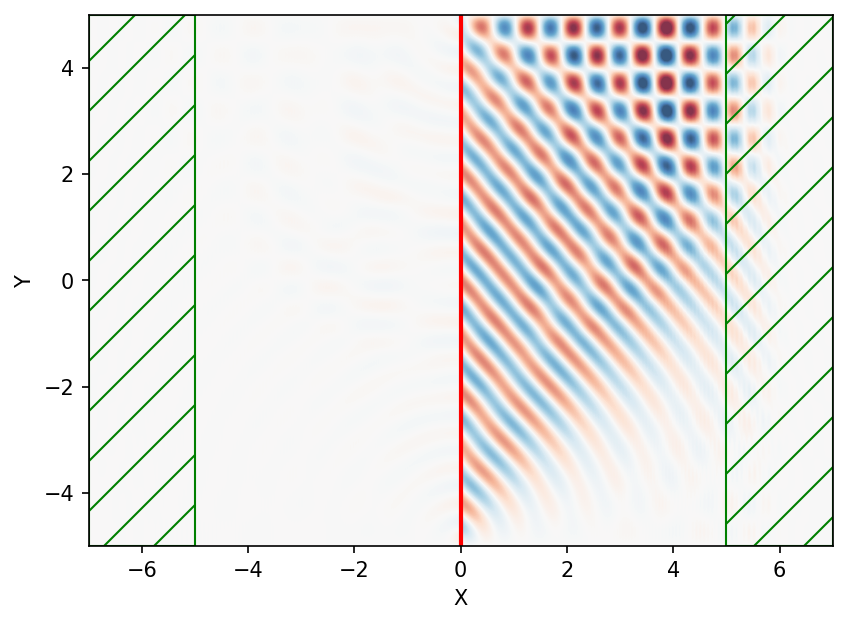

In [8]:
"""Demonstration of launching a planewave source at oblique incidence.

tutorial reference:
https://meep.readthedocs.io/en/latest/Python_Tutorials/Eigenmode_Source/#planewaves-in-homogeneous-media
"""

import matplotlib.pyplot as plt
import meep as mp
import numpy as np


mp.verbosity(2)

resolution_um = 50
pml_um = 2.0
size_um = 10.0
cell_size = mp.Vector3(size_um + 2 * pml_um, size_um, 0)
pml_layers = [mp.PML(thickness=pml_um, direction=mp.X)]

# Incident angle of planewave. 0 is +x with rotation in
# counter clockwise (CCW) direction around z axis.
incident_angle = np.radians(40.0)

wavelength_um = 1.0
frequency = 1 / wavelength_um

n_mat = 1.5  # refractive index of homogeneous material
default_material = mp.Medium(index=n_mat)

k_point = mp.Vector3(n_mat * frequency, 0, 0).rotate(
    mp.Vector3(0, 0, 1), incident_angle
)

if incident_angle == 0:
    direction = mp.AUTOMATIC
    eig_parity = mp.EVEN_Y + mp.ODD_Z
    symmetries = [mp.Mirror(mp.Y)]
    eig_vol = None
else:
    direction = mp.NO_DIRECTION
    eig_parity = mp.ODD_Z
    symmetries = []
    eig_vol = mp.Volume(center=mp.Vector3(), size=mp.Vector3(0, 1 / resolution_um, 0))

sources = [
    mp.EigenModeSource(
        src=mp.ContinuousSource(frequency),
        center=mp.Vector3(),
        size=mp.Vector3(0, size_um, 0),
        direction=direction,
        eig_kpoint=k_point,
        eig_band=1,
        eig_parity=eig_parity,
        # eig_vol=eig_vol,
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution_um,
    boundary_layers=pml_layers,
    sources=sources,
    k_point=k_point,
    default_material=default_material,
    symmetries=symmetries,
)

t = 10  # run time
f = plt.figure(dpi=150)
volume = mp.Block(size=mp.Vector3(size_um + 2 * pml_um, size_um, 0), center=mp.Vector3(0,0,0))
Animate = mp.Animate2D(sim, output_plane=volume, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.1, Animate), until=t)

filename = "test.mp4"
Animate.to_mp4(10,filename)
Video(filename)